<a href="https://colab.research.google.com/github/GiacomoMM/blood-cell-classification-detection/blob/main/Progetto_LabIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install optuna
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn as sk
import torch
import torchvision
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.9 MB/s eta 0:00:00


#Data download

In [2]:
import requests
import zipfile
from pathlib import Path

data_path=Path("data/")
#se ci sono gia i dati
if data_path.is_dir():
  print("directory esiste già")
else:
  data_path.mkdir(parents=True,exist_ok=True)
  print("directory data creata")

with open(data_path / "PBC_dataset_normal_DIB_224.zip","wb") as f:
  request=requests.get("https://github.com/GiacomoMM/blood-cell-classification-detection/raw/main/PBC_dataset_normal_DIB_224.zip?download=")
  print("downloading dataset")
  f.write(request.content)

with zipfile.ZipFile(data_path / "PBC_dataset_normal_DIB_224.zip","r") as zip_f:
  print("unzipping dataset")
  zip_f.extractall(data_path)


directory data creata
downloading dataset
unzipping dataset


In [3]:
import os
def directory(dir_path):
  for dirpath,dirname,filename in os.walk(dir_path):
    print(f"Ci sono {len(dirname)} directory e {len(filename)} immagini in {dirpath}")

In [4]:
directory(data_path)

Ci sono 1 directory e 1 immagini in data
Ci sono 8 directory e 0 immagini in data/PBC_dataset_normal_DIB_224
Ci sono 0 directory e 1218 immagini in data/PBC_dataset_normal_DIB_224/basophil
Ci sono 0 directory e 1214 immagini in data/PBC_dataset_normal_DIB_224/lymphocyte
Ci sono 0 directory e 1420 immagini in data/PBC_dataset_normal_DIB_224/monocyte
Ci sono 0 directory e 3117 immagini in data/PBC_dataset_normal_DIB_224/eosinophil
Ci sono 0 directory e 2895 immagini in data/PBC_dataset_normal_DIB_224/ig
Ci sono 0 directory e 2348 immagini in data/PBC_dataset_normal_DIB_224/platelet
Ci sono 0 directory e 1551 immagini in data/PBC_dataset_normal_DIB_224/erythroblast
Ci sono 0 directory e 3329 immagini in data/PBC_dataset_normal_DIB_224/neutrophil


#Analisi Dati

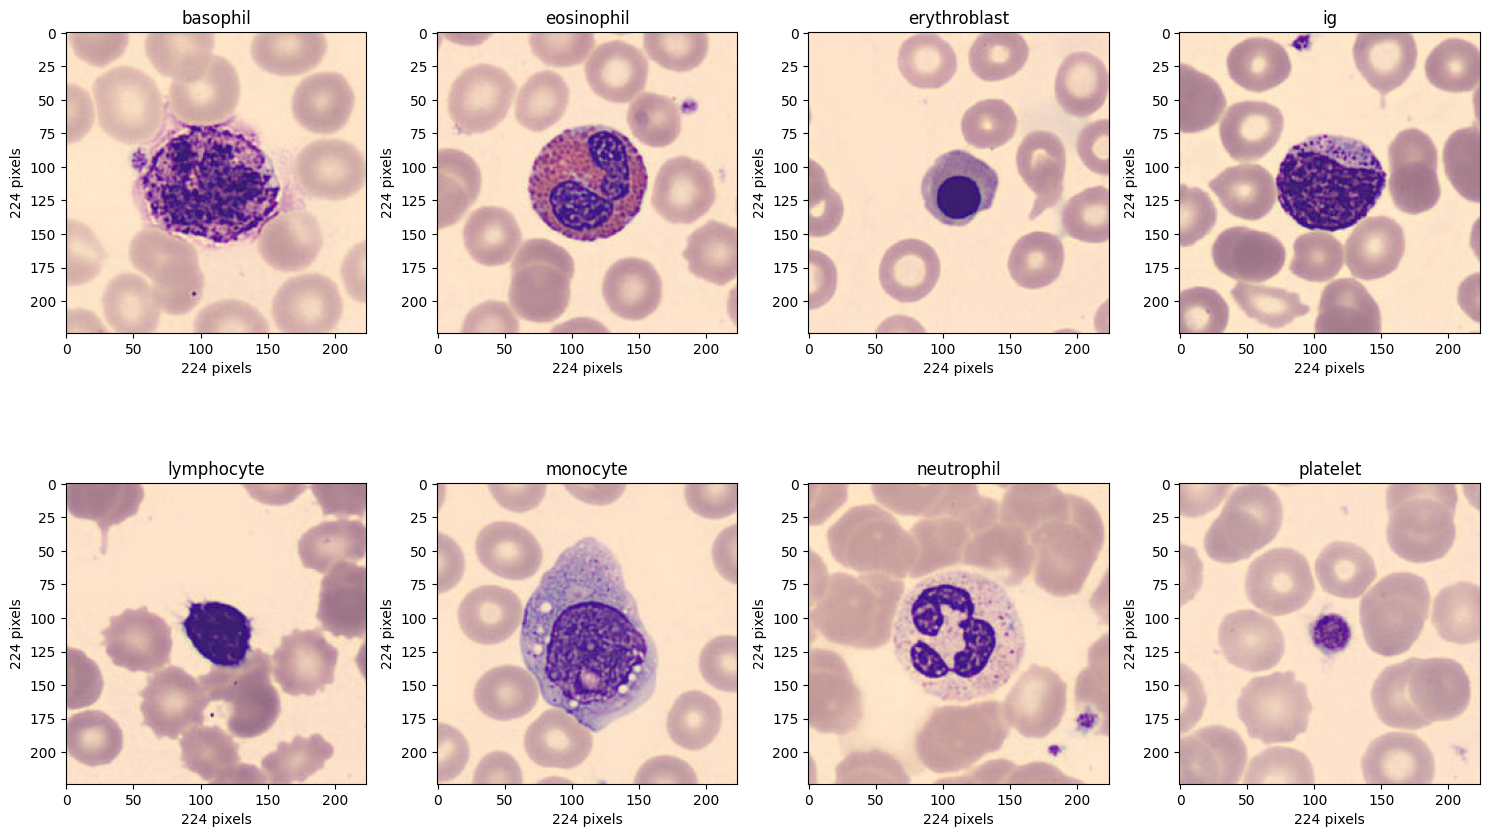

In [5]:
import random
from PIL import Image
import matplotlib.pyplot as plt

lista_path=list()
lista_classi=list()

image_basophil_path=Path("/content/data/PBC_dataset_normal_DIB_224/basophil/")
image_basophil_path_list= list(image_basophil_path.glob("*.jpg"))
random_image_basophil_path=random.choice(image_basophil_path_list)
#image_basophil=Image.open(random_image_basophil_path)
lista_classi.append(random_image_basophil_path.parent.stem)
lista_path.append(random_image_basophil_path)

image_eosinophil_path=Path("/content/data/PBC_dataset_normal_DIB_224/eosinophil/")
image_eosinophil_path_list= list(image_eosinophil_path.glob("*.jpg"))
random_image_eosinophil_path=random.choice(image_eosinophil_path_list)
#image_eosinophil=Image.open(random_image_eosinophil_path)
lista_classi.append(random_image_eosinophil_path.parent.stem)
lista_path.append(random_image_eosinophil_path)

image_erythroblast_path=Path("/content/data/PBC_dataset_normal_DIB_224/erythroblast/")
image_erythroblast_path_list= list(image_erythroblast_path.glob("*.jpg"))
random_image_erythroblast_path=random.choice(image_erythroblast_path_list)
#image_erythroblast=Image.open(random_image_erythroblast_path)
lista_classi.append(random_image_erythroblast_path.parent.stem)
lista_path.append(random_image_erythroblast_path)

image_ig_path=Path("/content/data/PBC_dataset_normal_DIB_224/ig/")
image_ig_path_list= list(image_ig_path.glob("*.jpg"))
random_image_ig_path=random.choice(image_ig_path_list)
#image_ig=Image.open(random_image_ig_path)
lista_classi.append(random_image_ig_path.parent.stem)
lista_path.append(random_image_ig_path)

image_lymphocyte_path=Path("/content/data/PBC_dataset_normal_DIB_224/lymphocyte/")
image_lymphocyte_path_list= list(image_lymphocyte_path.glob("*.jpg"))
random_image_lymphocyte_path=random.choice(image_lymphocyte_path_list)
#image_lymphocyte=Image.open(random_image_lymphocyte_path)
lista_classi.append(random_image_lymphocyte_path.parent.stem)
lista_path.append(random_image_lymphocyte_path)

image_monocyte_path=Path("/content/data/PBC_dataset_normal_DIB_224/monocyte/")
image_monocyte_path_list= list(image_monocyte_path.glob("*.jpg"))
random_image_monocyte_path=random.choice(image_monocyte_path_list)
#image_monocyte=Image.open(random_image_monocyte_path)
lista_classi.append(random_image_monocyte_path.parent.stem)
lista_path.append(random_image_monocyte_path)

image_neutrophil_path=Path("/content/data/PBC_dataset_normal_DIB_224/neutrophil/")
image_neutrophil_path_list= list(image_neutrophil_path.glob("*.jpg"))
random_image_neutrophil_path=random.choice(image_neutrophil_path_list)
#image_neutrophil=Image.open(random_image_neutrophil_path)
lista_classi.append(random_image_neutrophil_path.parent.stem)
lista_path.append(random_image_neutrophil_path)

image_platelet_path=Path("/content/data/PBC_dataset_normal_DIB_224/platelet/")
image_platelet_path_list= list(image_platelet_path.glob("*.jpg"))
random_image_platelet_path=random.choice(image_platelet_path_list)
#image_platelet=Image.open(random_image_platelet_path)
lista_classi.append(random_image_platelet_path.parent.stem)
lista_path.append(random_image_platelet_path)


plot,axs=plt.subplots(nrows=2,ncols=4,figsize=(15,15))

for i in range(8):
  image =Image.open(lista_path[i])
  ax = axs[i // 4, i % 4]
  ax.imshow(image)
  ax.set_title(f"{lista_classi[i]}")
  width, height = image.size
  ax.set_xlabel(f"{width} pixels")
  ax.set_ylabel(f"{height} pixels")

plt.tight_layout(h_pad=-26.0)
plt.show()


In [6]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

transform = transforms.Compose([
    #transforms.Resize(size=(96,96)),
    transforms.ToTensor()
])

dataset = ImageFolder(root="/content/data/PBC_dataset_normal_DIB_224", transform=transform, allow_empty=False)
print(dataset.classes)
print(dataset.class_to_idx)
print(f"Numero totale di immagini: {len(dataset)}")


['basophil', 'eosinophil', 'erythroblast', 'ig', 'lymphocyte', 'monocyte', 'neutrophil', 'platelet']
{'basophil': 0, 'eosinophil': 1, 'erythroblast': 2, 'ig': 3, 'lymphocyte': 4, 'monocyte': 5, 'neutrophil': 6, 'platelet': 7}
Numero totale di immagini: 17092


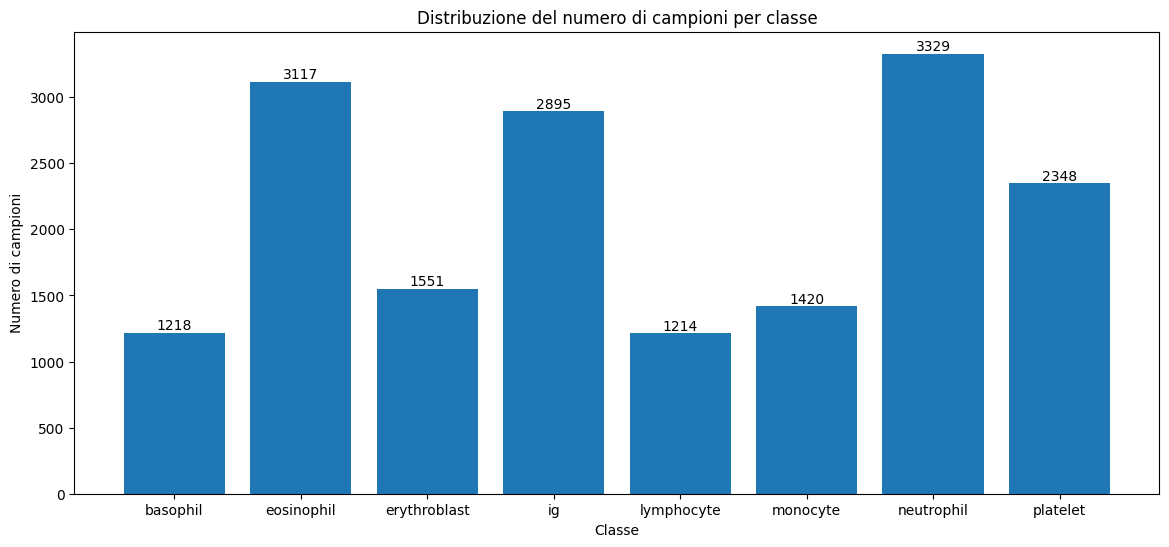

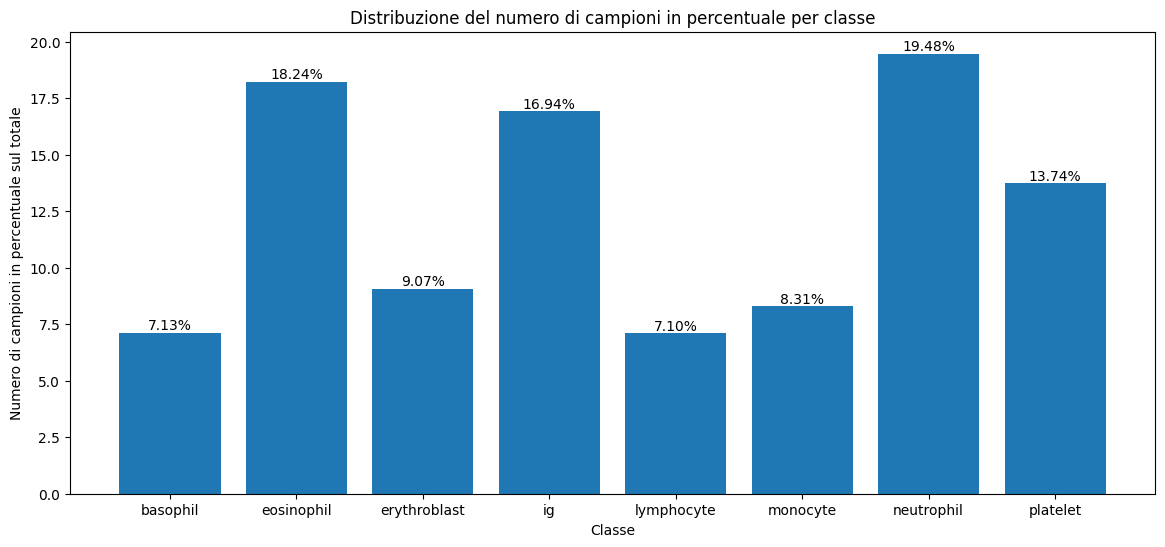

In [7]:
classes = dataset.classes
class_counts = [0]*8

for _, indx in dataset:
    class_counts[indx] += 1

plt.figure(figsize=(14, 6))
bar=plt.bar(classes, class_counts)
plt.bar_label(bar)
plt.xlabel("Classe")
plt.ylabel("Numero di campioni")
plt.title("Distribuzione del numero di campioni per classe")
plt.show()

#percentuale sul totale
for i in range(len(class_counts)):
  class_counts[i]=class_counts[i]/len(dataset)*100


plt.figure(figsize=(14, 6))
bar=plt.bar(classes, class_counts)
plt.bar_label(bar,fmt="%.2f%%")
plt.xlabel("Classe")
plt.ylabel("Numero di campioni in percentuale sul totale")
plt.title("Distribuzione del numero di campioni in percentuale per classe")
plt.show()

#Manipolazione Dati

In [8]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print('Using PyTorch version:', torch.__version__, ' Device:', device)

torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

torch.backends.cudnn.determinstic = True
torch.backends.cudnn.benchmark = False

Using PyTorch version: 2.3.0+cu121  Device: cuda


In [9]:
from torch.utils.data import DataLoader,random_split,TensorDataset

train_size = int(0.6 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size= len(dataset)-train_size-val_size

dataset_loader = DataLoader(dataset, batch_size=len(dataset), shuffle=True)

data_loader, label_loader = next(iter(dataset_loader))

dataset_mix = TensorDataset(data_loader, label_loader)

In [10]:
c_label_train=0
c_label_val=0
c_label_test=0
while(c_label_train<8 and c_label_val<8 and c_label_test<8):
  train_dataset,val_dataset,test_dataset = random_split(dataset_mix,[train_size,val_size,test_size])
  labels=[]
  for idx,(img,label) in enumerate(train_dataset):
    if label not in labels:
      labels.append(label)
      c_label_train=c_label_train+1
  print(f"c_label_train: {c_label_train}")
  labels=[]
  for idx,(img,label) in enumerate(val_dataset):
    if label not in labels:
      labels.append(label)
      c_label_val=c_label_val+1
  print(f"c_label_val: {c_label_val}")
  labels=[]
  for idx,(img,label) in enumerate(test_dataset):
    if label not in labels:
      labels.append(label)
      c_label_test=c_label_test+1
  print(f"c_label_test: {c_label_test}")

c_label_train: 8
c_label_val: 8
c_label_test: 8


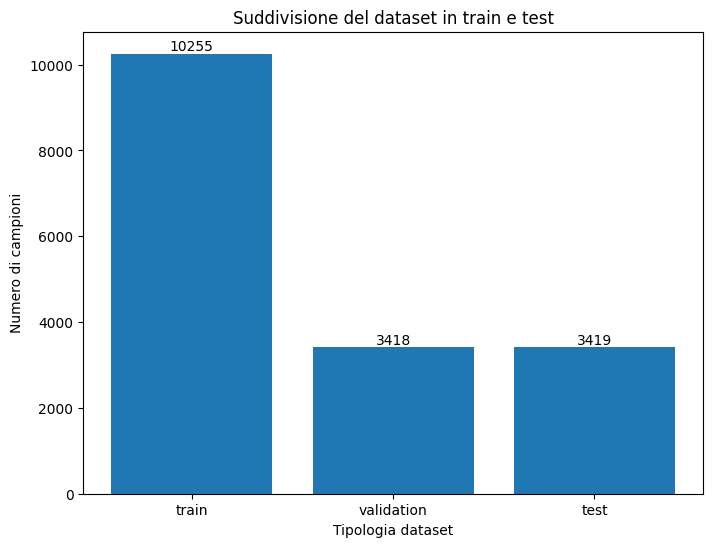

In [11]:
plt.figure(figsize=(8, 6))
bar=plt.bar(["train","validation", "test"], [len(train_dataset.indices),len(val_dataset.indices),len(test_dataset.indices)])
plt.bar_label(bar)
plt.xlabel("Tipologia dataset")
plt.ylabel("Numero di campioni")
plt.title("Suddivisione del dataset in train e test")
plt.show()

In [12]:
#DataLoader
train_loader=DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader=DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader=DataLoader(test_dataset, batch_size=64, shuffle=False)

dataiter = iter(train_loader)
images, labels = next(dataiter)
print("tipologia loader: ",type(images))
print("shape immagine: ",images.shape)
print("label shape: ",labels.shape)

tipologia loader:  <class 'torch.Tensor'>
shape immagine:  torch.Size([64, 3, 224, 224])
label shape:  torch.Size([64])


In [13]:
data = []
for idx, (image, label) in enumerate(train_dataset):
    image_np = np.asarray(image)
    data.append({
        "image": image_np.flatten(),
        "label": dataset.classes[label],
    })
train_pd = pd.DataFrame(data)
train_pd = train_pd.sample(frac=1).reset_index(drop=True)

data = []
for idx, (image, label) in enumerate(val_dataset):
    image_np = np.asarray(image)
    data.append({
        "image": image_np.flatten(),
        "label": dataset.classes[label],
    })
val_pd = pd.DataFrame(data)
val_pd = val_pd.sample(frac=1).reset_index(drop=True)

data = []
for idx, (image, label) in enumerate(test_dataset):
    image_np = np.asarray(image)
    data.append({
        "image": image_np.flatten(),
        "label": dataset.classes[label],
    })
test_pd = pd.DataFrame(data)
test_pd = val_pd.sample(frac=1).reset_index(drop=True)

train_pd.head()

,image,label
0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",ig
1,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.996...",erythroblast
2,"[0.98039216, 0.9843137, 0.99215686, 0.99215686...",erythroblast
3,"[0.99607843, 0.9764706, 0.98039216, 0.95686275...",ig
4,"[0.8235294, 0.81960785, 0.8156863, 0.80784315,...",platelet


In [14]:
#divisione feature
X_train_pd =train_pd["image"]
y_train_pd =train_pd["label"]

X_val_pd =val_pd["image"]
y_val_pd =val_pd["label"]

X_test_pd =test_pd["image"]
y_test_pd =test_pd["label"]
print(len(y_train_pd.unique()))
print(len(y_val_pd.unique()))
print(len(y_test_pd.unique()))

8
8
8


#Modello 1: Logistic Regression

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#ricerca iperparametro learning rate
warnings.filterwarnings("ignore",category=ConvergenceWarning)
learning_rate=100
best_rate=[]
best_accuracy=[]
for i in range(7):
  model = LogisticRegression(max_iter=5,solver="sag",n_jobs=-1,C=learning_rate)
  model.fit(X_train_pd.to_list(), y_train_pd)
  y_pred = model.predict(X_val_pd.to_list())
  accuracy = accuracy_score(y_val_pd, y_pred)
  print(f"Accuracy: {accuracy} con learning rate: {learning_rate}")
  best_rate.append(learning_rate)
  best_accuracy.append(accuracy)
  learning_rate=learning_rate/10


Accuracy: 0.6132241076653013 con learning rate: 100
Accuracy: 0.7094792276184904 con learning rate: 10.0
Accuracy: 0.7129900526623757 con learning rate: 1.0
Accuracy: 0.6772966647162083 con learning rate: 0.1
Accuracy: 0.6799297834991223 con learning rate: 0.01
Accuracy: 0.6451141018139263 con learning rate: 0.001
Accuracy: 0.7217671152720889 con learning rate: 0.0001


miglior accuracy: 0.7217671152720889
miglior rate: 0.0001


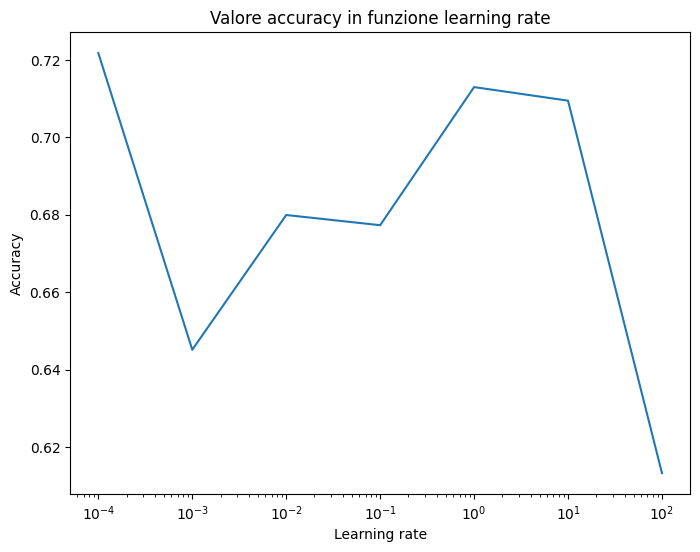

In [ ]:
accuracy=max(best_accuracy)
idx=best_accuracy.index(accuracy)
learning_rate=best_rate[idx]
print(f"miglior accuracy: {accuracy}")
print(f"miglior rate: {learning_rate}")

plt.figure(figsize=(8, 6))
plt.plot(best_rate,best_accuracy)
plt.xscale("log")
plt.xlabel("Learning rate")
plt.ylabel("Accuracy")
plt.title("Valore accuracy in funzione learning rate")
plt.show()

In [ ]:
model = LogisticRegression(max_iter=20,solver="sag",n_jobs=-1,C=learning_rate)
model.fit(X_train_pd.to_list(), y_train_pd)
y_pred = model.predict(X_test_pd.to_list())

In [ ]:
#Metriche
from sklearn.metrics import classification_report
accuracy_lr=accuracy_score(y_test_pd,y_pred)
print(f"Valore accuracy: {accuracy_lr}")

report = classification_report(y_test_pd,y_pred)
print(f"Classification Report: \n{report}")

Valore accuracy: 0.7399063779988297
Classification Report: 
              precision    recall  f1-score   support

    basophil       0.58      0.35      0.44       215
  eosinophil       0.86      0.88      0.87       620
erythroblast       0.79      0.66      0.72       294
          ig       0.52      0.67      0.58       611
  lymphocyte       0.71      0.72      0.71       253
    monocyte       0.56      0.27      0.36       283
  neutrophil       0.79      0.86      0.82       665
    platelet       0.95      0.99      0.97       477

    accuracy                           0.74      3418
   macro avg       0.72      0.67      0.69      3418
weighted avg       0.74      0.74      0.73      3418



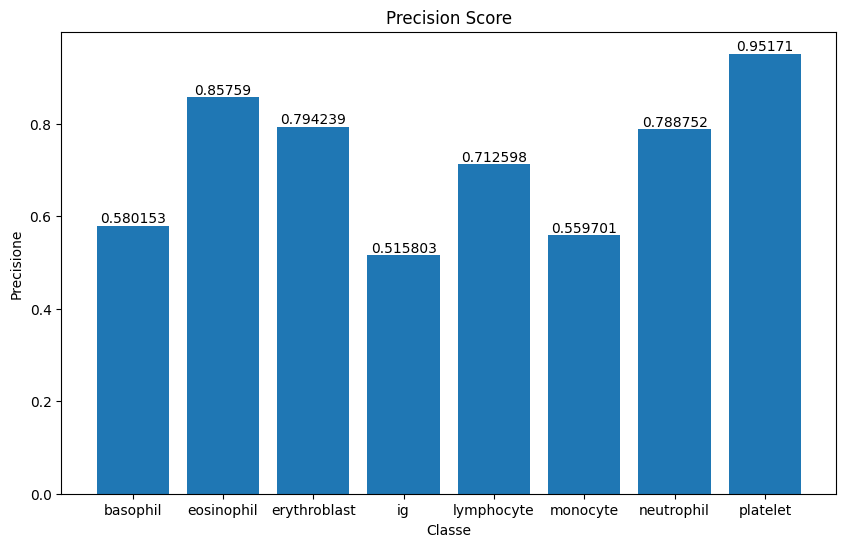

In [ ]:
from sklearn.metrics import precision_score
classe=["basophil","eosinophil","erythroblast","ig","lymphocyte","monocyte","neutrophil","platelet"]
plt.figure(figsize=(10, 6))
bar=plt.bar(classe, precision_score(y_test_pd,y_pred, average=None))
plt.bar_label(bar)
plt.xlabel("Classe")
plt.ylabel("Precisione")
plt.title("Precision Score")
plt.show()

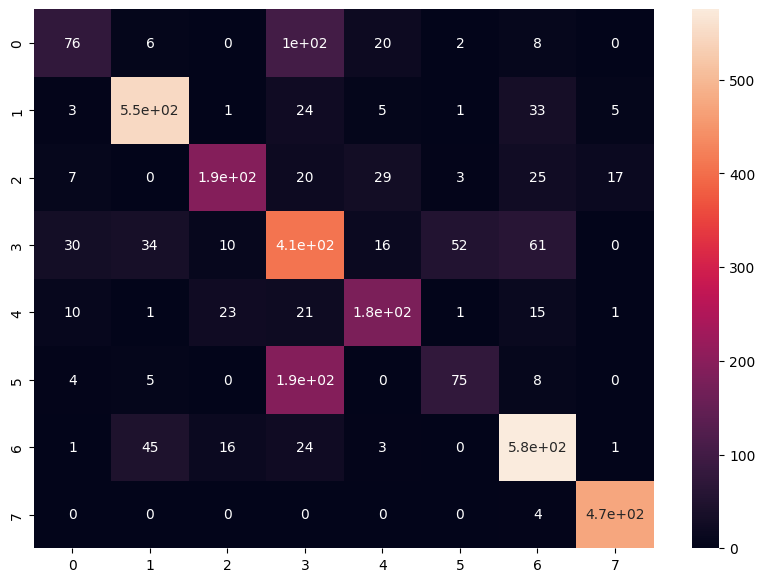

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#plot confusion_matrix
cm = confusion_matrix(y_test_pd,y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.show()

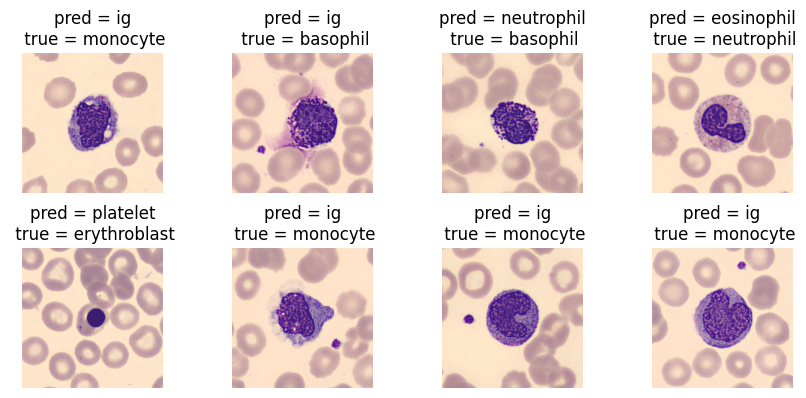

In [ ]:
misclassified = np.where(y_pred != y_test_pd)[0]
plot,axs=plt.subplots(nrows=2,ncols=4,figsize=(8,8))
for i in range(8):
  ax = axs[i // 4, i % 4]
  im=X_test_pd.iloc[misclassified[i*5]]
  im=im.reshape(3,224,224).T
  ax.imshow(im)
  ax.set_title("pred = " + y_pred[misclassified[i*5]] + "\n true = " + y_test_pd.iloc[misclassified[i*5]])
  ax.axis("off")
plt.tight_layout(h_pad=-20.0,w_pad=5)
plt.show()

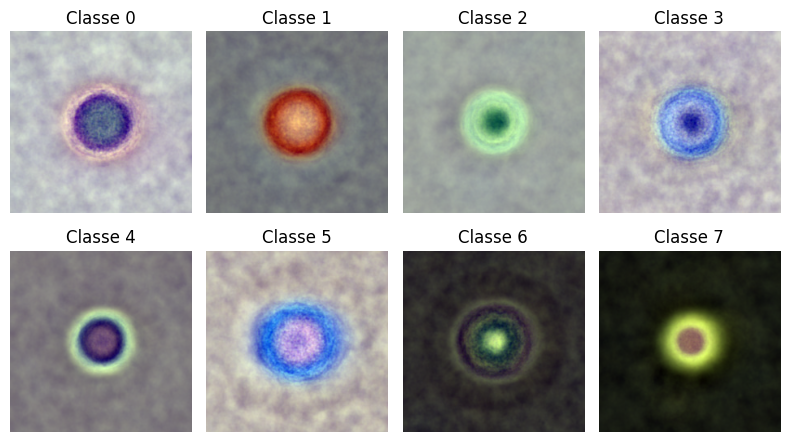

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#coefficienti
coefficients = model.coef_
image_shape = (3,224,224)
n_classes = coefficients.shape[0]
images = []
scaler = MinMaxScaler()

plot,axs=plt.subplots(nrows=2,ncols=4,figsize=(8,8))
for i in range(len(coefficients)):
  im = scaler.fit_transform(coefficients[i].reshape(-1, 1))
  im=im.reshape(3,224,224).T
  ax = axs[i // 4, i % 4]
  im=ax.imshow(im)
  ax.set_title(f"Classe {i}")
  ax.axis("off")
plt.tight_layout(h_pad=-15.0)
plt.show()

#Modello 2:KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

best_k=[]
best_accuracy=[]
for i in range(1,10):
  model = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
  model.fit(X_train_pd.to_list(), y_train_pd)
  y_pred = model.predict(X_val_pd.to_list())
  accuracy = accuracy_score(y_val_pd, y_pred)
  print(f"accuracy: {accuracy} con k: {i}")
  best_k.append(i)
  best_accuracy.append(accuracy)

accuracy: 0.15974253949678174 con k: 1
accuracy: 0.08191925102399064 con k: 2
accuracy: 0.1301930953774137 con k: 3
accuracy: 0.14423639555295495 con k: 4
accuracy: 0.08250438853130486 con k: 5
accuracy: 0.12229373902867174 con k: 6
accuracy: 0.10912814511410181 con k: 7
accuracy: 0.11527208894090112 con k: 8
accuracy: 0.09274429490930369 con k: 9


miglior accuracy: 0.15974253949678174
miglior numero di neighbors: 1


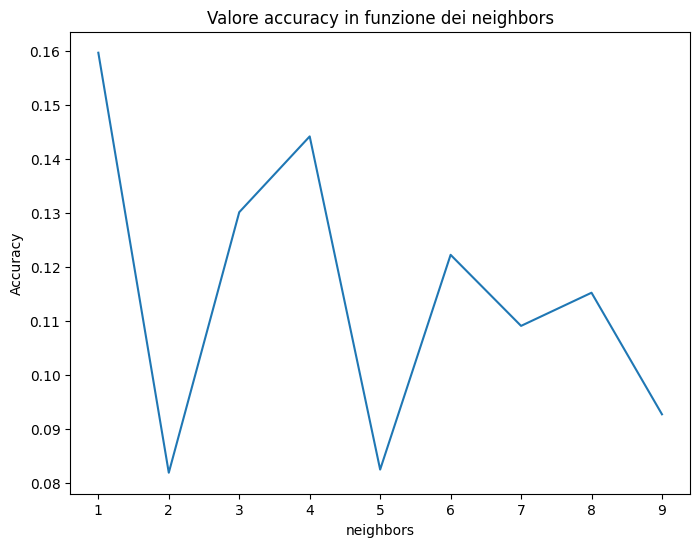

In [ ]:
accuracy=max(best_accuracy)
idx=best_accuracy.index(accuracy)
k_valore=best_k[idx]
print(f"miglior accuracy: {accuracy}")
print(f"miglior numero di neighbors: {k_valore}")

plt.figure(figsize=(8, 6))
plt.plot(best_k,best_accuracy)
plt.xlabel("neighbors")
plt.ylabel("Accuracy")
plt.title("Valore accuracy in funzione dei neighbors")
plt.show()

In [ ]:
model = KNeighborsClassifier(n_neighbors=k_valore,n_jobs=-1)
model.fit(X_train_pd.to_list(), y_train_pd)
y_pred = model.predict(X_test_pd.to_list())

In [ ]:
#Metriche
from sklearn.metrics import classification_report,precision_score
accuracy_lr=accuracy_score(y_test_pd,y_pred)
print(f"Valore accuracy: {accuracy_lr}")

report = classification_report(y_test_pd,y_pred)
print(f"Classification Report: \n{report}")

Valore accuracy: 0.1617905207723815
Classification Report: 
              precision    recall  f1-score   support

    basophil       0.07      0.08      0.07       215
  eosinophil       0.18      0.07      0.11       620
erythroblast       0.00      0.00      0.00       294
          ig       0.18      0.18      0.18       611
  lymphocyte       0.00      0.00      0.00       253
    monocyte       0.09      0.08      0.09       283
  neutrophil       0.19      0.36      0.25       665
    platelet       0.15      0.24      0.18       477

    accuracy                           0.16      3418
   macro avg       0.11      0.13      0.11      3418
weighted avg       0.13      0.16      0.14      3418



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


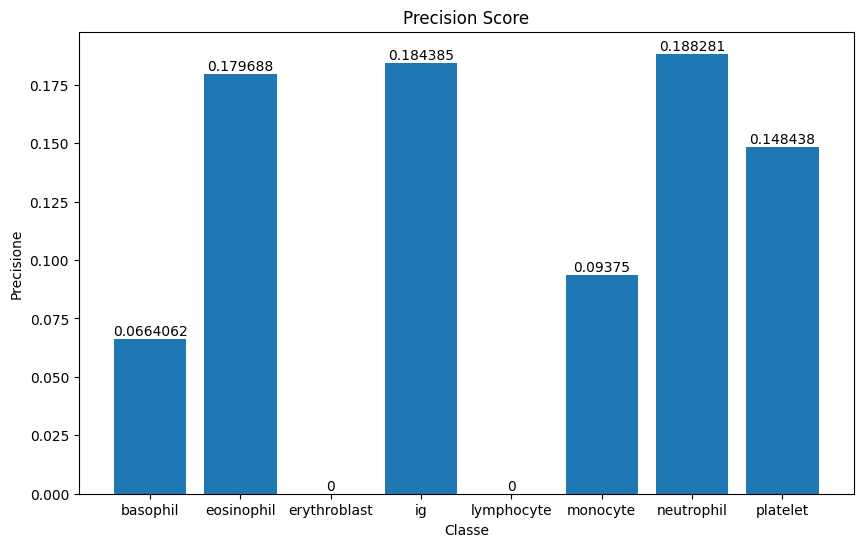

In [ ]:
classe=["basophil","eosinophil","erythroblast","ig","lymphocyte","monocyte","neutrophil","platelet"]
plt.figure(figsize=(10, 6))
bar=plt.bar(classe, precision_score(y_test_pd,y_pred, average=None))
plt.bar_label(bar)
plt.xlabel("Classe")
plt.ylabel("Precisione")
plt.title("Precision Score")
plt.show()

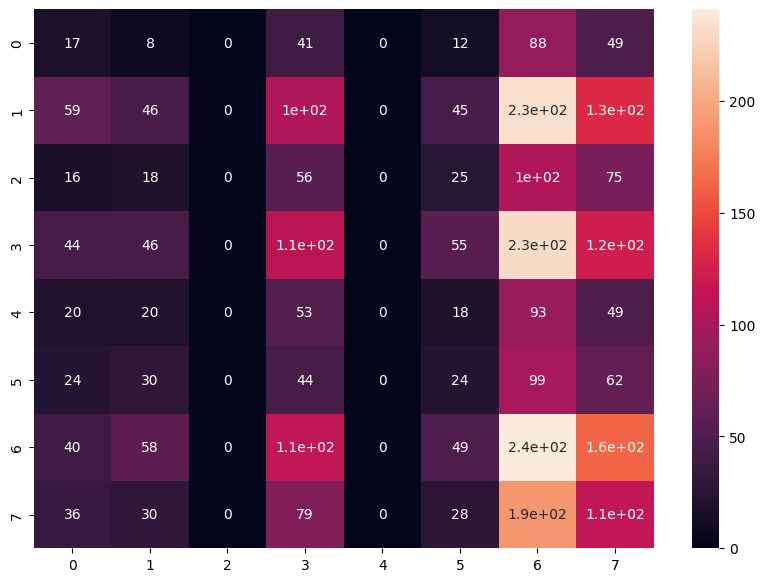

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#plot confusion_matrix
cm = confusion_matrix(y_test_pd,y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.show()

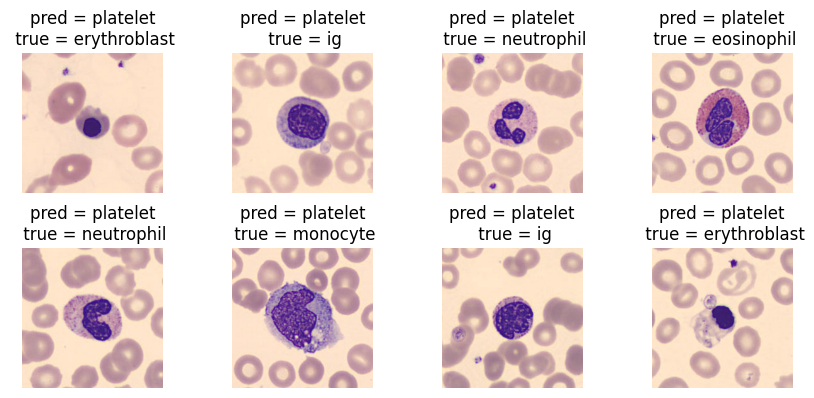

In [ ]:
misclassified = np.where(y_pred != y_test_pd)[0]
plot,axs=plt.subplots(nrows=2,ncols=4,figsize=(8,8))
for i in range(8):
  ax = axs[i // 4, i % 4]
  im=X_test_pd.iloc[misclassified[i*5]]
  im=im.reshape(3,224,224).T
  ax.imshow(im)
  ax.set_title("pred = " + y_pred[misclassified[i*5]] + "\n true = " + y_test_pd.iloc[misclassified[i*5]])
  ax.axis("off")
plt.tight_layout(h_pad=-20.0,w_pad=5)
plt.show()

#Modello 3: DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

profondita=[]
best_accuracy=[]

for i in range(1,20):
  model = DecisionTreeClassifier(criterion="entropy",max_depth=i)
  model = model.fit(X_train_pd.to_list(),y_train_pd)
  y_pred = model.predict(X_val_pd.to_list())
  accuracy = accuracy_score(y_val_pd, y_pred)
  print(f"{accuracy} alla profondita {i}")
  if(i>=2 and best_accuracy[i-2]>accuracy):
    profondita.append(i)
    best_accuracy.append(accuracy)
    break
  profondita.append(i)
  best_accuracy.append(accuracy)

0.3025160912814511 alla profondita 1
0.43358689291983615 alla profondita 2
0.5166764189584553 alla profondita 3
0.5629022820362786 alla profondita 4
0.6190754827384435 alla profondita 5
0.6299005266237566 alla profondita 6
0.655061439438268 alla profondita 7
0.6609128145114102 alla profondita 8
0.6500877706260971 alla profondita 9


miglior accuracy: 0.6609128145114102
miglior profondita: 8


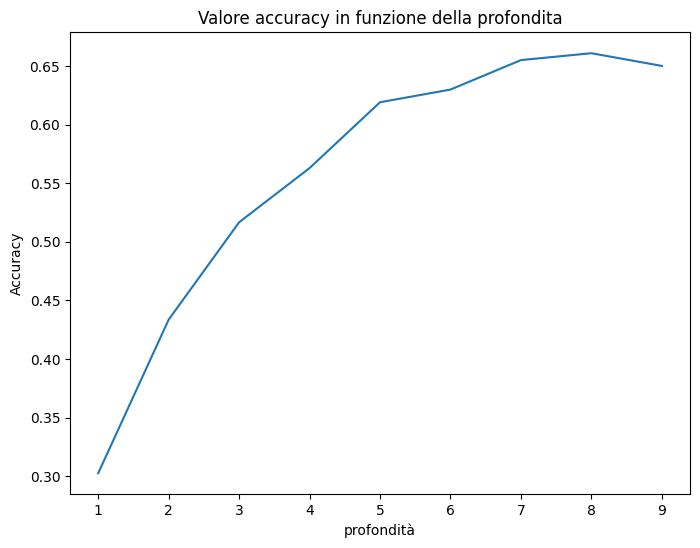

In [ ]:
accuracy=max(best_accuracy)
idx=best_accuracy.index(accuracy)
profondita_best=profondita[idx]
print(f"miglior accuracy: {accuracy}")
print(f"miglior profondita: {profondita_best}")

plt.figure(figsize=(8, 6))
plt.plot(profondita,best_accuracy)
plt.xlabel("profondità")
plt.ylabel("Accuracy")
plt.title("Valore accuracy in funzione della profondita")
plt.show()

In [ ]:
model = DecisionTreeClassifier(criterion="entropy",max_depth=profondita_best)
model = model.fit(X_train_pd.to_list(),y_train_pd)
y_pred = model.predict(X_test_pd.to_list())

In [ ]:
#Metriche
from sklearn.metrics import classification_report,precision_score
accuracy_lr=accuracy_score(y_test_pd,y_pred)
print(f"Valore accuracy: {accuracy_lr}")

report = classification_report(y_test_pd,y_pred)
print(f"Classification Report: \n{report}")

Valore accuracy: 0.657694558221182
Classification Report: 
              precision    recall  f1-score   support

    basophil       0.32      0.23      0.27       215
  eosinophil       0.79      0.73      0.76       620
erythroblast       0.69      0.69      0.69       294
          ig       0.47      0.54      0.50       611
  lymphocyte       0.67      0.68      0.67       253
    monocyte       0.41      0.31      0.35       283
  neutrophil       0.67      0.76      0.72       665
    platelet       0.94      0.94      0.94       477

    accuracy                           0.66      3418
   macro avg       0.62      0.61      0.61      3418
weighted avg       0.65      0.66      0.65      3418



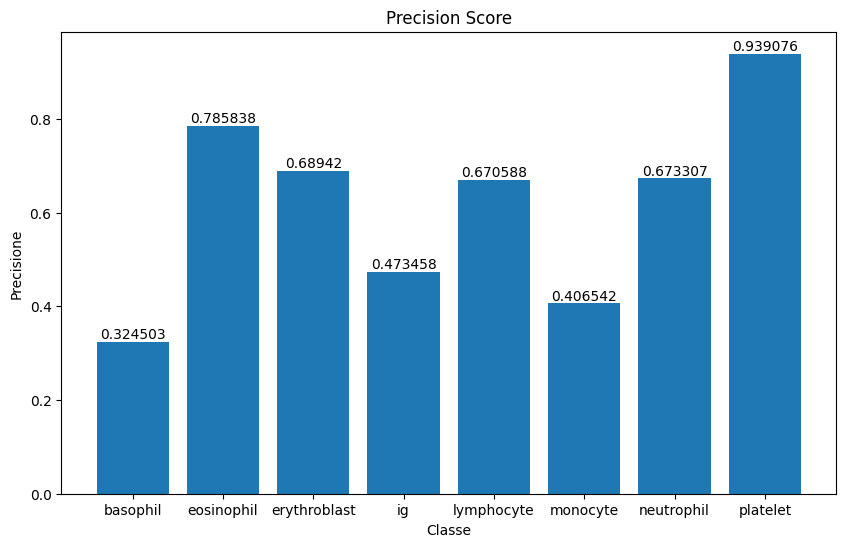

In [ ]:
classe=["basophil","eosinophil","erythroblast","ig","lymphocyte","monocyte","neutrophil","platelet"]
plt.figure(figsize=(10, 6))
bar=plt.bar(classe, precision_score(y_test_pd,y_pred, average=None))
plt.bar_label(bar)
plt.xlabel("Classe")
plt.ylabel("Precisione")
plt.title("Precision Score")
plt.show()

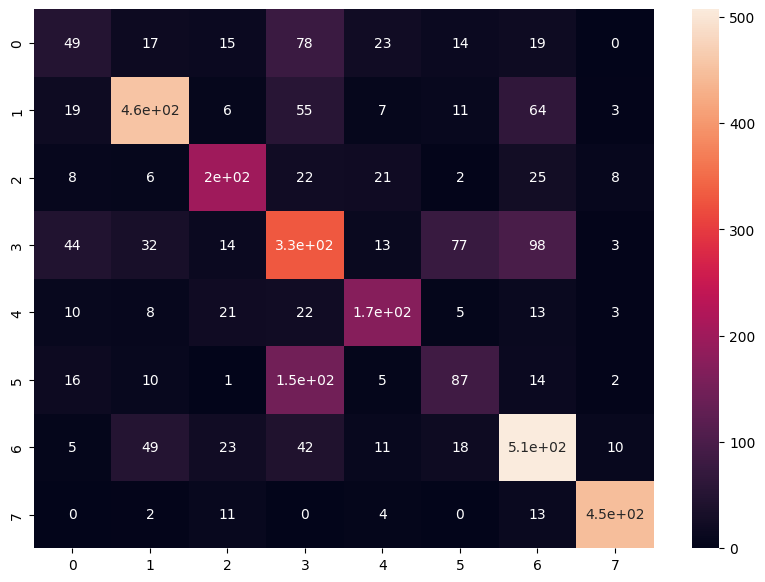

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#plot confusion_matrix
cm = confusion_matrix(y_test_pd,y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.show()

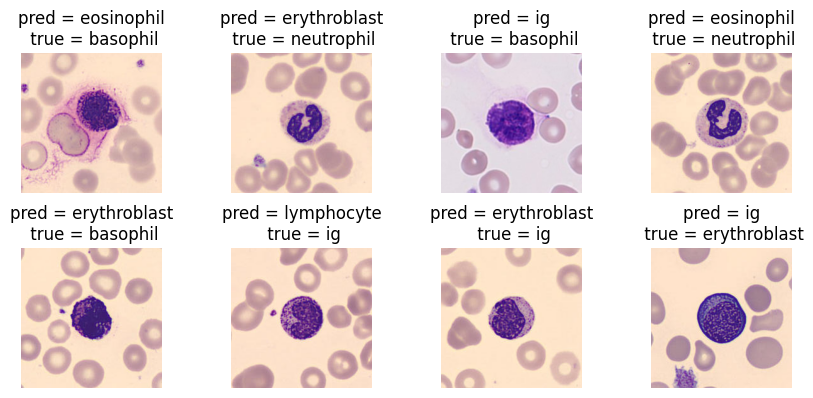

In [ ]:
misclassified = np.where(y_pred != y_test_pd)[0]
plot,axs=plt.subplots(nrows=2,ncols=4,figsize=(8,8))
for i in range(8):
  ax = axs[i // 4, i % 4]
  im=X_test_pd.iloc[misclassified[i*5]]
  im=im.reshape(3,224,224).T
  ax.imshow(im)
  ax.set_title("pred = " + y_pred[misclassified[i*5]] + "\n true = " + y_test_pd.iloc[misclassified[i*5]])
  ax.axis("off")
plt.tight_layout(h_pad=-20.0,w_pad=5)
plt.show()

#Modello 4:Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion="entropy",n_jobs=-1)
model.fit(X_train_pd.to_list(),y_train_pd)
y_pred=model.predict(X_test_pd.to_list())

In [ ]:
#Metriche
from sklearn.metrics import classification_report,precision_score
accuracy_lr=accuracy_score(y_test_pd,y_pred)
print(f"Valore accuracy: {accuracy_lr}")

report = classification_report(y_test_pd,y_pred)
print(f"Classification Report: \n{report}")

Valore accuracy: 0.8361614979520188
Classification Report: 
              precision    recall  f1-score   support

    basophil       0.83      0.48      0.61       215
  eosinophil       0.93      0.94      0.93       620
erythroblast       0.93      0.80      0.86       294
          ig       0.64      0.82      0.72       611
  lymphocyte       0.81      0.83      0.82       253
    monocyte       0.83      0.44      0.57       283
  neutrophil       0.85      0.94      0.89       665
    platelet       0.98      1.00      0.99       477

    accuracy                           0.84      3418
   macro avg       0.85      0.78      0.80      3418
weighted avg       0.85      0.84      0.83      3418



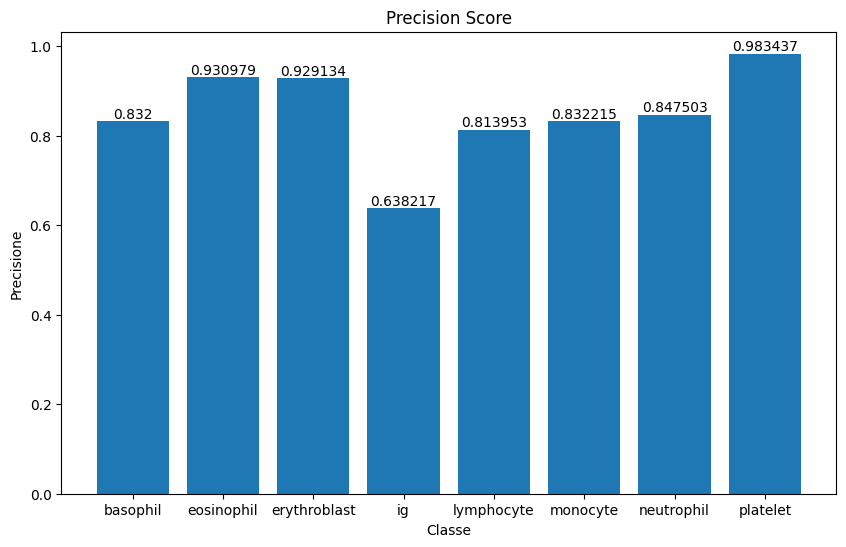

In [ ]:
classe=["basophil","eosinophil","erythroblast","ig","lymphocyte","monocyte","neutrophil","platelet"]
plt.figure(figsize=(10, 6))
bar=plt.bar(classe, precision_score(y_test_pd,y_pred, average=None))
plt.bar_label(bar)
plt.xlabel("Classe")
plt.ylabel("Precisione")
plt.title("Precision Score")
plt.show()

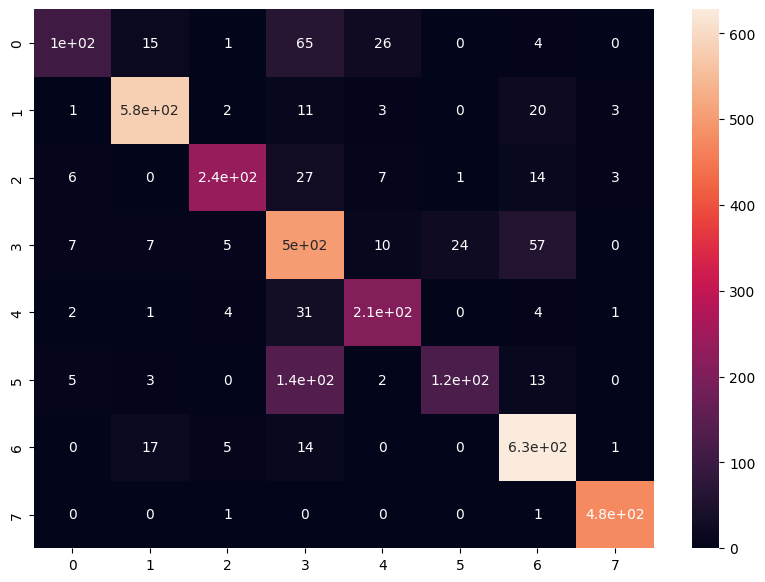

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#plot confusion_matrix
cm = confusion_matrix(y_test_pd,y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.show()

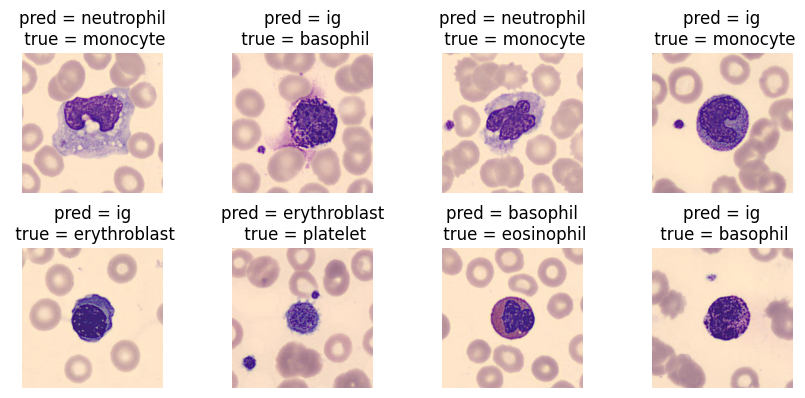

In [ ]:
misclassified = np.where(y_pred != y_test_pd)[0]
plot,axs=plt.subplots(nrows=2,ncols=4,figsize=(8,8))
for i in range(8):
  ax = axs[i // 4, i % 4]
  im=X_test_pd.iloc[misclassified[i*5]]
  im=im.reshape(3,224,224).T
  ax.imshow(im)
  ax.set_title("pred = " + y_pred[misclassified[i*5]] + "\n true = " + y_test_pd.iloc[misclassified[i*5]])
  ax.axis("off")
plt.tight_layout(h_pad=-20.0,w_pad=5)
plt.show()

#Modello 5: Stacking

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
estimators = [
    ("rf",RandomForestClassifier(criterion="entropy",n_jobs=-1)),
    ("knn",KNeighborsClassifier(n_neighbors=k_valore,n_jobs=-1)),
    ("dt",DecisionTreeClassifier(criterion="entropy",max_depth=profondita_best))
]

ImportError: cannot import name 'DecisionTreeClassifier' from 'sklearn.ensemble' (/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/__init__.py)

In [ ]:
from sklearn.ensemble import StackingClassifier
model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=20,solver="sag",n_jobs=-1,C=learning_rate),n_jobs=-1)
model.fit(X_train_pd.to_list(),y_train_pd)
y_pred=model.predict(X_test_pd.to_list())

NameError: name 'estimators' is not defined

In [ ]:
#Metriche
from sklearn.metrics import classification_report,precision_score
accuracy=accuracy_score(y_test_pd,y_pred)
print(f"Valore accuracy: {accuracy}")

report = classification_report(y_test_pd,y_pred)
print(f"Classification Report: \n{report}")

In [ ]:
classe=["basophil","eosinophil","erythroblast","ig","lymphocyte","monocyte","neutrophil","platelet"]
plt.figure(figsize=(10, 6))
bar=plt.bar(classe, precision_score(y_test_pd,y_pred, average=None))
plt.bar_label(bar)
plt.xlabel("Classe")
plt.ylabel("Precisione")
plt.title("Precision Score")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#plot confusion_matrix
cm = confusion_matrix(y_test_pd,y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.show()

In [ ]:
misclassified = np.where(y_pred != y_test_pd)[0]
plot,axs=plt.subplots(nrows=2,ncols=4,figsize=(8,8))
for i in range(8):
  ax = axs[i // 4, i % 4]
  im=X_test_pd.iloc[misclassified[i*5]]
  im=im.reshape(3,224,224).T
  ax.imshow(im)
  ax.set_title("pred = " + y_pred[misclassified[i*5]] + "\n true = " + y_test_pd.iloc[misclassified[i*5]])
  ax.axis("off")
plt.tight_layout(h_pad=-20.0,w_pad=5)
plt.show()

#Modello 6: Boosting

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

model = HistGradientBoostingClassifier(max_iter=5,n_iter_no_change=3,early_stopping=True)
param_grid = {
    "learning_rate": [1, 0.1, 0.01],
    "max_depth": [5, 7, 9],
}

In [ ]:
grid_search = GridSearchCV(estimator=model,param_grid=param_grid,scoring="accuracy",n_jobs=-1,cv=2)
grid_result=grid_search.fit(X_train_pd.to_list(),y_train_pd)

In [ ]:
print("Migliori parametri trovati:",grid_search.best_params_)

In [ ]:
y_pred = grid_search.best_estimator_.predict(X_val_pd.to_list())
accuracy = accuracy_score(y_val_pd, y_pred)
print("Accuracy sul val set:",accuracy)

In [ ]:
# Summarize results
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

In [ ]:
model = HistGradientBoostingClassifier(max_iter=30,**grid_search.best_params_,n_iter_no_change=3,,early_stopping=True)
model

In [ ]:
model.fit(X_train_pd.to_list(),y_train_pd)
y_pred = grid_search.best_estimator_.predict(X_test_pd.to_list())

In [ ]:
#Metriche
from sklearn.metrics import classification_report,precision_score
accuracy=accuracy_score(y_test_pd,y_pred)
print(f"Valore accuracy: {accuracy}")

report = classification_report(y_test_pd,y_pred)
print(f"Classification Report: \n{report}")

In [ ]:
classe=["basophil","eosinophil","erythroblast","ig","lymphocyte","monocyte","neutrophil","platelet"]
plt.figure(figsize=(10, 6))
bar=plt.bar(classe, precision_score(y_test_pd,y_pred, average=None))
plt.bar_label(bar)
plt.xlabel("Classe")
plt.ylabel("Precisione")
plt.title("Precision Score")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#plot confusion_matrix
cm = confusion_matrix(y_test_pd,y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.show()

In [ ]:
misclassified = np.where(y_pred != y_test_pd)[0]
plot,axs=plt.subplots(nrows=2,ncols=4,figsize=(8,8))
for i in range(8):
  ax = axs[i // 4, i % 4]
  im=X_test_pd.iloc[misclassified[i*5]]
  im=im.reshape(3,224,224).T
  ax.imshow(im)
  ax.set_title("pred = " + y_pred[misclassified[i*5]] + "\n true = " + y_test_pd.iloc[misclassified[i*5]])
  ax.axis("off")
plt.tight_layout(h_pad=-20.0,w_pad=5)
plt.show()

#Modello 7: NeuralNetwork

In [216]:
import torch.nn as nn
import torch.nn.functional as F
import optuna
import torch.optim as optim

class NeuralNetwork(nn.Module):
  def __init__(self,input_size=224*224*3,hidden_layers=[],n_layer=0,output_size=8):
    super(NeuralNetwork,self).__init__()
    self.layers = nn.ModuleList()
    self.n_layer=n_layer
    for i in range(self.n_layer):
        self.layers.append(nn.Linear(input_size, hidden_layers[i]))
        input_size = hidden_layers[i]
    self.layers.append(nn.Linear(input_size, output_size))

  def forward(self, x):
    x = x.view(-1, 3*224*224)
    for i in range(self.n_layer+1):
      x = F.leaky_relu(self.layers[i](x))
    return x

In [217]:
model=NeuralNetwork(hidden_layers=[],n_layer=0).to(device)
model

NeuralNetwork(
  (layers): ModuleList(
    (0): Linear(in_features=150528, out_features=8, bias=True)
  )
)

In [218]:
#Tuning iperparametri

def objective(trial):
    num_layers = trial.suggest_int("num_layers", 1, 10)
    hidden_layers = [trial.suggest_int(f"hidden_layer {i}", 8, 512,step=2) for i in range(num_layers)]
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1,log=True)

    model = NeuralNetwork(hidden_layers=hidden_layers,n_layer=num_layers).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    model.train()
    num_epoch=5
    for epoch in range(num_epoch):
        model.train()
        for batch_idx, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()

    model.eval()
    with torch.no_grad():
      correct = 0
      for batch_idx, (images, labels) in enumerate(val_loader):
          images, labels = images.to(device), labels.to(device)
          output = model(images)
          _, pred = torch.max(output, 1)
          correct += (pred == labels).sum().item()
    return 100 * correct / len(val_loader.dataset)


study = optuna.create_study(direction="maximize")
study.optimize(objective,timeout=600)

[I 2024-06-27 10:43:33,201] A new study created in memory with name: no-name-33e5458d-cd4a-4ece-9d35-11243090d238
[I 2024-06-27 10:44:06,308] Trial 0 finished with value: 18.139262726740785 and parameters: {'num_layers': 10, 'hidden_layer 0': 512, 'hidden_layer 1': 322, 'hidden_layer 2': 140, 'hidden_layer 3': 218, 'hidden_layer 4': 176, 'hidden_layer 5': 42, 'hidden_layer 6': 302, 'hidden_layer 7': 38, 'hidden_layer 8': 250, 'hidden_layer 9': 212, 'learning_rate': 0.0039051168141944937}. Best is trial 0 with value: 18.139262726740785.
[I 2024-06-27 10:44:27,278] Trial 1 finished with value: 32.153306026916326 and parameters: {'num_layers': 3, 'hidden_layer 0': 260, 'hidden_layer 1': 72, 'hidden_layer 2': 340, 'learning_rate': 0.0001949825409847735}. Best is trial 1 with value: 32.153306026916326.
[I 2024-06-27 10:44:46,227] Trial 2 finished with value: 18.139262726740785 and parameters: {'num_layers': 3, 'hidden_layer 0': 156, 'hidden_layer 1': 400, 'hidden_layer 2': 90, 'learning_rat

In [219]:
print(study.best_trial)
best_param=study.best_params
print("Migliori parametri:",best_param)

FrozenTrial(number=6, state=TrialState.COMPLETE, values=[67.14452896430662], datetime_start=datetime.datetime(2024, 6, 27, 10, 45, 49, 790494), datetime_complete=datetime.datetime(2024, 6, 27, 10, 46, 18, 190473), params={'num_layers': 10, 'hidden_layer 0': 412, 'hidden_layer 1': 368, 'hidden_layer 2': 188, 'hidden_layer 3': 304, 'hidden_layer 4': 72, 'hidden_layer 5': 12, 'hidden_layer 6': 406, 'hidden_layer 7': 466, 'hidden_layer 8': 50, 'hidden_layer 9': 154, 'learning_rate': 0.00022504901018125607}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'num_layers': IntDistribution(high=10, log=False, low=1, step=1), 'hidden_layer 0': IntDistribution(high=512, log=False, low=8, step=2), 'hidden_layer 1': IntDistribution(high=512, log=False, low=8, step=2), 'hidden_layer 2': IntDistribution(high=512, log=False, low=8, step=2), 'hidden_layer 3': IntDistribution(high=512, log=False, low=8, step=2), 'hidden_layer 4': IntDistribution(high=512, log=False, low=8, step=2),

In [220]:
optuna.visualization.plot_optimization_history(study)

In [221]:
optuna.visualization.plot_slice(study)

In [222]:
optuna.visualization.plot_param_importances(study)

In [223]:
lr=best_param["learning_rate"]
num_layer=best_param["num_layers"]
hidden_layer=[]
for i in range(num_layer):
  hidden_layer.append(best_param[f"hidden_layer {i}"])


In [224]:
model=NeuralNetwork(hidden_layers=hidden_layer,n_layer=num_layer).to(device)
model

NeuralNetwork(
  (layers): ModuleList(
    (0): Linear(in_features=150528, out_features=412, bias=True)
    (1): Linear(in_features=412, out_features=368, bias=True)
    (2): Linear(in_features=368, out_features=188, bias=True)
    (3): Linear(in_features=188, out_features=304, bias=True)
    (4): Linear(in_features=304, out_features=72, bias=True)
    (5): Linear(in_features=72, out_features=12, bias=True)
    (6): Linear(in_features=12, out_features=406, bias=True)
    (7): Linear(in_features=406, out_features=466, bias=True)
    (8): Linear(in_features=466, out_features=50, bias=True)
    (9): Linear(in_features=50, out_features=154, bias=True)
    (10): Linear(in_features=154, out_features=8, bias=True)
  )
)

In [225]:
#test finale numero di epoche
def train_epoche(num_epoch,model,lr,criterion):
  optimizer = optim.Adam(model.parameters(),lr=lr)
  for epoch in range(num_epoch):
          model.train()
          for batch_idx, (images, labels) in enumerate(train_loader):
              images, labels = images.to(device), labels.to(device)
              optimizer.zero_grad()
              output = model(images)
              loss = criterion(output, labels)
              loss.backward()
              optimizer.step()
              if batch_idx%40==0:
                print(f"Epoch [{epoch+1}/{num_epoch},{((epoch+1)/num_epoch)*100:.2f}%], Batch [{batch_idx+1}/{len(train_loader)},{((batch_idx+1)/len(train_loader))*100:.2f}%], Loss: {loss.data.item()}")


In [226]:
def validate_epoche(loss_vector,accuracy_vector,model,loader,criterion):
  model.eval()
  val_loss, correct = 0, 0
  with torch.no_grad():
      for batch_idx,(images, labels) in enumerate(loader):
          images,labels =images.to(device),labels.to(device)
          output = model(images)

          loss=criterion(output,labels)
          val_loss+=loss.item() * images.size(0)

          _, pred=torch.max(output, 1)
          correct+=(pred == labels).sum().item()
      print(f"Accuracy: {100 * correct / len(loader.dataset)} %")

  val_loss /= len(loader.dataset)
  accuracy = 100. * correct / len(loader.dataset)

  loss_vector.append(val_loss)
  accuracy_vector.append(accuracy)


In [227]:
lossv,accv = [], []
num_epoch =20
criterion = nn.CrossEntropyLoss()
model=NeuralNetwork(hidden_layers=hidden_layer,n_layer=num_layer).to(device)
for epoch in range(1, num_epoch + 1):
    train_epoche(epoch,model,lr,criterion)
    validate_epoche(lossv,accv,model,val_loader,criterion)

Epoch [1/1,100.00%], Batch [1/161,0.62%], Loss: 2.093817949295044
Epoch [1/1,100.00%], Batch [41/161,25.47%], Loss: 2.05645751953125
Epoch [1/1,100.00%], Batch [81/161,50.31%], Loss: 2.061727285385132
Epoch [1/1,100.00%], Batch [121/161,75.16%], Loss: 2.029682159423828
Epoch [1/1,100.00%], Batch [161/161,100.00%], Loss: 1.5309544801712036
Accuracy: 33.11878291398479 %
Epoch [1/2,50.00%], Batch [1/161,0.62%], Loss: 1.7865443229675293
Epoch [1/2,50.00%], Batch [41/161,25.47%], Loss: 1.7753318548202515
Epoch [1/2,50.00%], Batch [81/161,50.31%], Loss: 1.4370166063308716
Epoch [1/2,50.00%], Batch [121/161,75.16%], Loss: 1.4848684072494507
Epoch [1/2,50.00%], Batch [161/161,100.00%], Loss: 1.766142725944519
Epoch [2/2,100.00%], Batch [1/161,0.62%], Loss: 1.0556563138961792
Epoch [2/2,100.00%], Batch [41/161,25.47%], Loss: 1.2324849367141724
Epoch [2/2,100.00%], Batch [81/161,50.31%], Loss: 1.4488133192062378
Epoch [2/2,100.00%], Batch [121/161,75.16%], Loss: 1.1221541166305542
Epoch [2/2,100

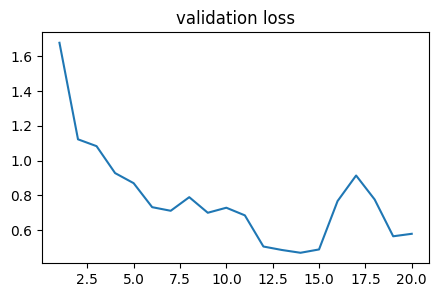

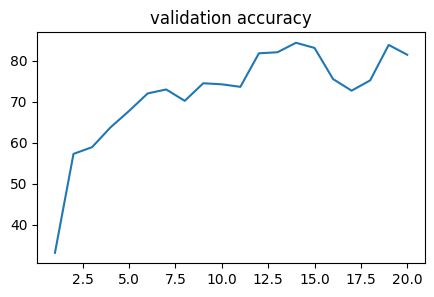

In [228]:
plt.figure(figsize=(5,3))
plt.plot(np.arange(1,num_epoch+1),lossv)
plt.title("validation loss")

plt.figure(figsize=(5,3))
plt.plot(np.arange(1,num_epoch+1),accv)
plt.title("validation accuracy");

In [229]:
#miglior numero di epoche
num_epoch=np.argmax(accv)+1
print(num_epoch)

14


In [230]:
def train(num_epoch,model,lr,criterion):
  optimizer = optim.Adam(model.parameters(),lr=lr)
  for epoch in range(num_epoch):
          model.train()
          for batch_idx, (images, labels) in enumerate(train_loader):
              images, labels = images.to(device), labels.to(device)
              optimizer.zero_grad()
              output = model(images)
              loss = criterion(output, labels)
              loss.backward()
              optimizer.step()
              if batch_idx%40==0:
                print(f"Epoch [{epoch+1}/{num_epoch},{((epoch+1)/num_epoch)*100:.2f}%], Batch [{batch_idx+1}/{len(train_loader)},{((batch_idx+1)/len(train_loader))*100:.2f}%], Loss: {loss.data.item()}")


In [231]:
def validate(model,loader,criterion):
  y_pred = []
  y_true = []
  model.eval()
  with torch.no_grad():
      correct = 0
      for batch_idx,(images, labels) in enumerate(loader):
          images, labels = images.to(device), labels.to(device)
          output = model(images)
          _, pred = torch.max(output, 1)
          y_pred.extend(pred.cpu().numpy())
          y_true.extend(labels.cpu().numpy())
          correct += (pred == labels).sum().item()
      print(f"Accuracy: {100 * correct / len(loader.dataset)} %")
  return y_pred,y_true

In [232]:
pred,y_true = [], []
criterion = nn.CrossEntropyLoss()
model=NeuralNetwork(hidden_layers=hidden_layer,n_layer=num_layer).to(device)
train(num_epoch,model,lr,criterion)
pred,y_true=validate(model,test_loader,criterion)

Epoch [1/14,7.14%], Batch [1/161,0.62%], Loss: 2.085805654525757
Epoch [1/14,7.14%], Batch [41/161,25.47%], Loss: 2.0147650241851807
Epoch [1/14,7.14%], Batch [81/161,50.31%], Loss: 2.0352108478546143
Epoch [1/14,7.14%], Batch [121/161,75.16%], Loss: 1.9925096035003662
Epoch [1/14,7.14%], Batch [161/161,100.00%], Loss: 1.7249759435653687
Epoch [2/14,14.29%], Batch [1/161,0.62%], Loss: 1.742555022239685
Epoch [2/14,14.29%], Batch [41/161,25.47%], Loss: 1.561784029006958
Epoch [2/14,14.29%], Batch [81/161,50.31%], Loss: 1.2868061065673828
Epoch [2/14,14.29%], Batch [121/161,75.16%], Loss: 1.5268892049789429
Epoch [2/14,14.29%], Batch [161/161,100.00%], Loss: 0.9408794045448303
Epoch [3/14,21.43%], Batch [1/161,0.62%], Loss: 1.5916149616241455
Epoch [3/14,21.43%], Batch [41/161,25.47%], Loss: 1.287041187286377
Epoch [3/14,21.43%], Batch [81/161,50.31%], Loss: 1.276157259941101
Epoch [3/14,21.43%], Batch [121/161,75.16%], Loss: 1.0632922649383545
Epoch [3/14,21.43%], Batch [161/161,100.00%

In [233]:
print(np.unique(y_true,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7]), array([241, 607, 308, 565, 231, 298, 705, 464]))


In [234]:
from sklearn.metrics import classification_report,precision_score
report = classification_report(y_true,pred)
print(f"Classification Report: \n{report}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.54      0.44      0.48       241
           1       0.67      0.80      0.73       607
           2       0.83      0.56      0.66       308
           3       0.50      0.65      0.56       565
           4       0.70      0.68      0.69       231
           5       0.55      0.24      0.34       298
           6       0.77      0.82      0.79       705
           7       0.99      0.95      0.97       464

    accuracy                           0.69      3419
   macro avg       0.69      0.64      0.65      3419
weighted avg       0.70      0.69      0.69      3419



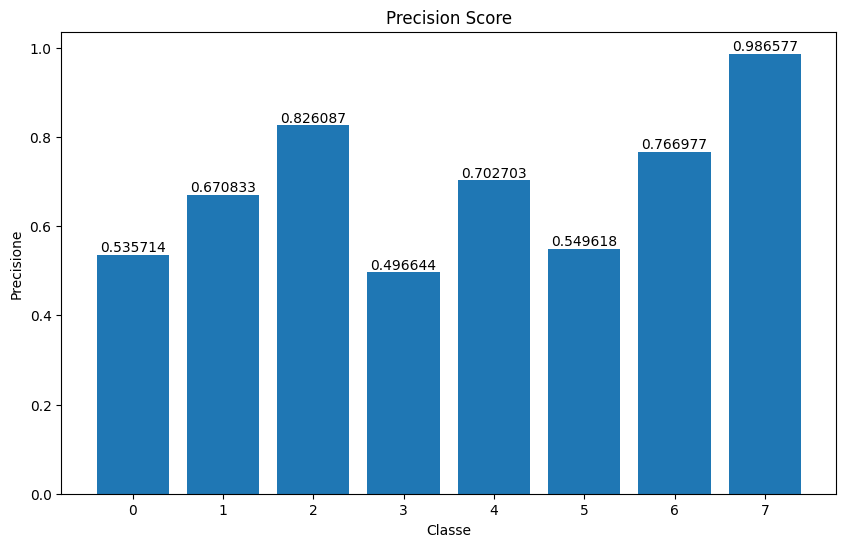

In [235]:
classe=np.arange(0,8)
plt.figure(figsize=(10, 6))
bar=plt.bar(classe, precision_score(y_true,pred,average=None))
plt.bar_label(bar)
plt.xlabel("Classe")
plt.ylabel("Precisione")
plt.title("Precision Score")
plt.show()

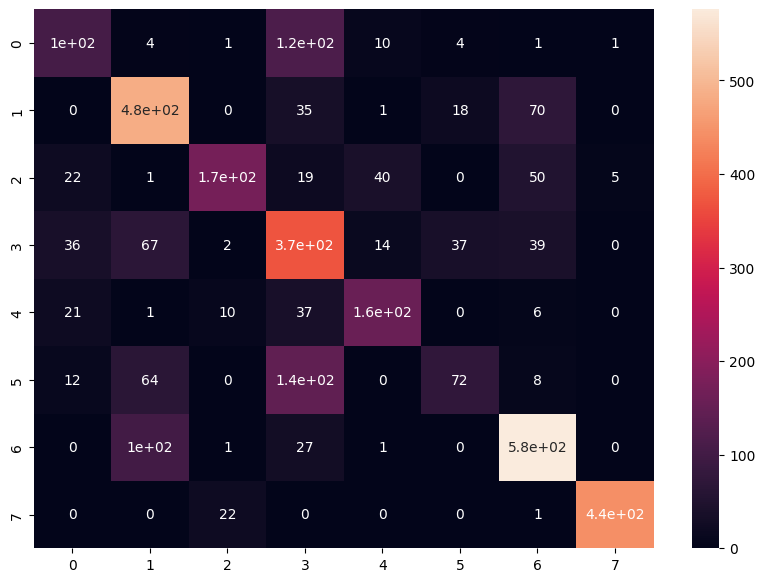

In [236]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.show()

#Modello 8: Convolutional neural network

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import optuna
import torch.optim as optim

class Conv_NeuralNetwork(nn.Module):
  def __init__(self,input_size=3,hidden_layers=[],n_layer=0,output_size=8):
    super(Conv_NeuralNetwork,self).__init__()
    self.layers = nn.ModuleList()
    self.n_layer=n_layer
    input=input_size
    for i in range(n_layer):
      if i%2==0:
        self.layers.append(nn.Sequential(nn.Conv2d(in_channels=input,out_channels=hidden_layers[i],kernel_size=3,padding=1),
                                         nn.LeakyReLU()
                                         ))
      else:
        self.layers.append(nn.Sequential(nn.Conv2d(in_channels=input,out_channels=hidden_layers[i],kernel_size=3,padding=1),
                                         nn.LeakyReLU(),
                                         nn.MaxPool2d(kernel_size=2)
                                         ))
      input=hidden_layers[i]
    self.layers.append(nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input,out_features=output_size)
    ))

  def forward(self, x):
    for i in range(self.n_layer+1):
      x = self.layers[i](x)
    return x

In [ ]:
model=Conv_NeuralNetwork(hidden_layers=[],n_layer=0).to(device)
model

NameError: name 'device' is not defined

In [ ]:
#Tuning iperparametri

def objective(trial):
    num_layers = trial.suggest_int("num_layers", 1, 10)
    hidden_layers = [trial.suggest_int(f"hidden_layer {i}", 4, 20,step=2) for i in range(num_layers)]
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1,log=True)

    model = NeuralNetwork(hidden_layers=hidden_layers,n_layer=num_layers).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    model.train()
    num_epoch=5
    for epoch in range(num_epoch):
        model.train()
        for batch_idx, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    model.eval()
    with torch.no_grad():
      correct = 0
      for images, labels in val_loader:
          images, labels = images.to(device), labels.to(device)
          outputs = model(images)
          _, predicted = torch.max(outputs.data, 1)
          correct += (predicted == labels).sum().item()
    return 100 * correct / len(val_loader.dataset)


study = optuna.create_study(direction="maximize")
study.optimize(objective,timeout=600)

[I 2024-06-25 16:57:35,886] A new study created in memory with name: no-name-4420c8d1-d937-4cf2-a4d7-e2d22ac2e8d8
[I 2024-06-25 16:57:48,060] Trial 0 finished with value: 50.43885313048566 and parameters: {'num_layers': 10, 'hidden_layer 0': 18, 'hidden_layer 1': 10, 'hidden_layer 2': 4, 'hidden_layer 3': 20, 'hidden_layer 4': 10, 'hidden_layer 5': 16, 'hidden_layer 6': 4, 'hidden_layer 7': 14, 'hidden_layer 8': 12, 'hidden_layer 9': 18, 'learning_rate': 0.01229983846507858}. Best is trial 0 with value: 50.43885313048566.
[I 2024-06-25 16:57:56,336] Trial 1 finished with value: 53.276770040959626 and parameters: {'num_layers': 2, 'hidden_layer 0': 16, 'hidden_layer 1': 20, 'learning_rate': 0.0017262354516973026}. Best is trial 1 with value: 53.276770040959626.
[I 2024-06-25 16:58:03,264] Trial 2 finished with value: 40.95962551199532 and parameters: {'num_layers': 1, 'hidden_layer 0': 8, 'learning_rate': 7.808219804764075e-05}. Best is trial 1 with value: 53.276770040959626.
[I 2024-06

In [ ]:
print(study.best_trial)
best_param=study.best_params
print("Migliori parametri:",best_param)

FrozenTrial(number=23, state=TrialState.COMPLETE, values=[65.74019894675249], datetime_start=datetime.datetime(2024, 6, 25, 17, 1, 10, 660944), datetime_complete=datetime.datetime(2024, 6, 25, 17, 1, 19, 632819), params={'num_layers': 7, 'hidden_layer 0': 6, 'hidden_layer 1': 12, 'hidden_layer 2': 6, 'hidden_layer 3': 16, 'hidden_layer 4': 16, 'hidden_layer 5': 6, 'hidden_layer 6': 16, 'learning_rate': 0.0007600562849256963}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'num_layers': IntDistribution(high=10, log=False, low=1, step=1), 'hidden_layer 0': IntDistribution(high=20, log=False, low=4, step=2), 'hidden_layer 1': IntDistribution(high=20, log=False, low=4, step=2), 'hidden_layer 2': IntDistribution(high=20, log=False, low=4, step=2), 'hidden_layer 3': IntDistribution(high=20, log=False, low=4, step=2), 'hidden_layer 4': IntDistribution(high=20, log=False, low=4, step=2), 'hidden_layer 5': IntDistribution(high=20, log=False, low=4, step=2), 'hidden_layer

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
optuna.visualization.plot_slice(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

In [ ]:
lr=best_param["learning_rate"]
num_layer=best_param["num_layers"]
hidden_layer=[]
for i in range(num_layer):
  hidden_layer.append(best_param[f"hidden_layer {i}"])

In [ ]:
model=NeuralNetwork(hidden_layers=hidden_layer,n_layer=num_layer).to(device)
model

NeuralNetwork(
  (layers): ModuleList(
    (0): Linear(in_features=27648, out_features=6, bias=True)
    (1): Linear(in_features=6, out_features=12, bias=True)
    (2): Linear(in_features=12, out_features=6, bias=True)
    (3): Linear(in_features=6, out_features=16, bias=True)
    (4): Linear(in_features=16, out_features=16, bias=True)
    (5): Linear(in_features=16, out_features=6, bias=True)
    (6): Linear(in_features=6, out_features=16, bias=True)
    (7): Linear(in_features=16, out_features=8, bias=True)
  )
)

In [ ]:
#test finale
model=NeuralNetwork(hidden_layers=hidden_layer,n_layer=num_layer).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=lr)

num_epoch =best_param["num_epoch"]
for epoch in range(num_epoch):
        model.train()
        for batch_idx, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            if batch_idx%40==0:
              print(f"Epoch [{epoch+1}/{num_epoch},{((epoch+1)/num_epoch)*100:.2f}%], Batch [{batch_idx+1}/{len(train_loader)},{((batch_idx+1)/len(train_loader))*100:.2f}%], Loss: {loss.data.item()}")


In [ ]:
model.eval()
loss_vector=[]
accuracy_vector=[]

val_loss, correct = 0, 0
with torch.no_grad():
    correct = 0
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()
    print(f"Accuracy: {100 * correct / len(test_loader.dataset)} %")

    val_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)

    loss_vector.append(val_loss)
    accuracy_vector.append(accuracy)


In [ ]:
plt.figure(figsize=(5,3))
plt.plot(np.arange(1,num_epoch+1), loss_vector)
plt.title("validation loss")

plt.figure(figsize=(5,3))
plt.plot(np.arange(1,num_epoch+1), accuracy_vector)
plt.title("validation accuracy");

#Stato dell' arte

In [251]:
import torchvision.models as models
resnet=models.resnet50(weights="ResNet50_Weights.DEFAULT")

In [252]:
model = resnet.to(device)
resnet.eval()
with torch.no_grad():
    correct = 0
    for batch_idx,(images, labels) in enumerate(test_loader):
        images, labels = images.to(device), labels.to(device)
        output = model(images)
        _, pred = torch.max(output, 1)
        correct += (pred == labels).sum().item()
    print(f"Accuracy: {100 * correct / len(test_loader.dataset)} %")


Accuracy: 1.4331675928634104 %
